In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
import h5py
import tensorflow as tf
from tensorflow import keras

print("tf.__version__",tf.__version__)

tf.__version__ 2.11.0


In [15]:
corrfile = r'C:\CAMELS DATA\corrfuncs_LHsim\IllustrisLH_corfuncs.h5'
f = h5py.File(corrfile, 'r')
#looking to see data in cataloge
def print_dataset_name(name,g):
    print(name,'&',g)
f.visititems(print_dataset_name)
corrfuncs = []
for filenum in range(100,131):
    simcorfunc = f[f'simulation{filenum}/corrfunc'][:]
    corrfuncs.append(simcorfunc)
r = f['simulation0/bins'][:]
# pos_sh  = f['Subhalo/SubhaloPos'][:]/1e3     #positions of SUBFIND subhalos in Mpc/h
# subh_M_R_12 = f['Subhalo/SubhaloMassInRadType'][:,4]*1e10 # total stellar mass of twice the stellare alf-mass radius in Msun/h
# nstar_h = f['Group/GroupLenType'][:,4]            # total number of stars in each halo
# nstar_sh = f['Subhalo/SubhaloLenType'][:,4]            # total number of stars in each subhalo
# n_subhalos = f['Group/GroupNsubs'][:]
# close file
f.close()

simulation0 & <HDF5 group "/simulation0" (3 members)>
simulation0/bins & <HDF5 dataset "bins": shape (8,), type "<f8">
simulation0/corrfunc & <HDF5 dataset "corrfunc": shape (45, 8), type "<f8">
simulation0/corrvar & <HDF5 dataset "corrvar": shape (45,), type "<f8">
simulation1 & <HDF5 group "/simulation1" (2 members)>
simulation1/corrfunc & <HDF5 dataset "corrfunc": shape (45, 8), type "<f8">
simulation1/corrvar & <HDF5 dataset "corrvar": shape (45,), type "<f8">
simulation100 & <HDF5 group "/simulation100" (2 members)>
simulation100/corrfunc & <HDF5 dataset "corrfunc": shape (45, 8), type "<f8">
simulation100/corrvar & <HDF5 dataset "corrvar": shape (45,), type "<f8">
simulation101 & <HDF5 group "/simulation101" (2 members)>
simulation101/corrfunc & <HDF5 dataset "corrfunc": shape (45, 8), type "<f8">
simulation101/corrvar & <HDF5 dataset "corrvar": shape (45,), type "<f8">
simulation102 & <HDF5 group "/simulation102" (2 members)>
simulation102/corrfunc & <HDF5 dataset "corrfunc": sh

In [9]:
corrfuncs1 = np.array(corrfuncs)
corrfuncs1.shape

(31, 45, 8)

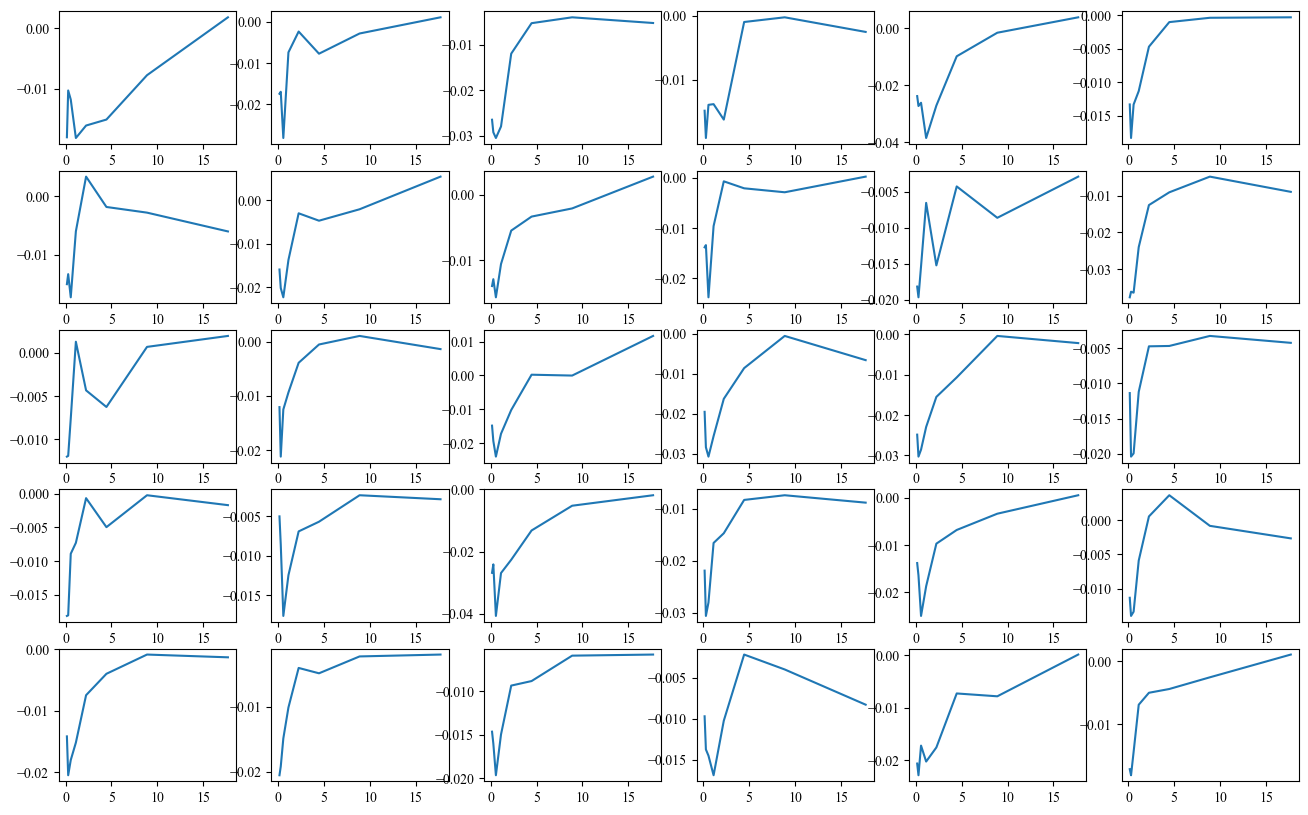

In [16]:
fig, ax = plt.subplots(5, 6,figsize=(16, 10))
k=0
for i in range(5):
    for j in range(6):
        sim_mean = np.mean(corrfuncs1[k],axis=0)
        k+=1
        ax[i,j].plot(r,sim_mean)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
model = keras.Sequential([normalizer,
    keras.layers.Dense(20,input_shape=(8,),activation="sigmoid"),
    keras.layers.Dense(10,activation='sigmoid'),
    keras.layers.Dense(8,activation='linear')
])
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

In [ ]:
%%time
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [ ]:
model.evaluate(test_features, test_labels, verbose=0)